In [1]:
import os
import json
import pandas as pd
import numpy as np


In [3]:
ciper_suits = {
    '1305':0,
    'C030':1,
	'C02C':2,
	'C028':3,
	'C024':4,
	'C014':5,
	'C00A':6,
	'00A5':7,
	'00A3':8,
	'00A1':9,
	'009F':10,
	'006B':11,
	'006A':12,
	'0069':13,
	'0068':14,
	'0039':15,
	'0038':16,
	'0037':17,
	'0036':18,
	'0088':19,
	'0087':20,
	'0086':21,
	'0085':22,
	'C019':23,
	'00A7':24,
	'006D':25,
	'003A':26,
	'0089':27,
	'C032':28,
	'C02E':29,
	'C02A':30,
	'C026':31,
	'C00F':32,
	'C005':33,
	'009D':34,
	'003D':35,
	'0035':36,
	'0084':37,
	'008D':38,
	'C02F':39,
	'C02B':40,
	'C027':41,
	'C023':42,
	'C013':43,
	'C009':44,
	'00A4':45,
	'00A2':46,
	'00A0':47,
	'009E':48,
	'0067':49,
	'0040':50,
	'003F':51,
	'003E':52,
	'0033':53,
	'0032':54,
	'0031':55,
	'0030':56,
	'009A':57,
	'0099':58,
	'0098':59,
	'0097':60,
	'0045':61,
	'0044':62,
	'0043':63,
	'0042':64,
	'C018':65,
	'00A6':66,
	'006C':67,
	'0034':68,
	'009B':69,
	'0046':70,
	'C031':71,
	'C02D':72,
	'C029':73,
	'C025':74,
	'C00E':75,
	'C004':76,
	'009C':77,
	'003C':78,
	'002F':79,
	'0096':80,
	'0041':81,
	'008C':82,
	'C012':83,
	'C008':84,
	'0016':85,
	'0013':86,
	'0010':87,
	'000D':88,
	'C017':89,
	'001B':90,
	'C00D':91,
	'C003':92,
	'000A':93,
	'0007':94,
	'008B':95,
	'0021':96,
	'001F':97,
	'0025':98,
	'0023':99,
	'C011':100,
	'C007':101,
	'C016':102,
	'0018':103,
	'C00C':104,
	'C002':105,
	'0005':106,
	'0004':107,
	'008A':108,
	'0020':109,
	'0024':110,
	'C010':111,
	'C006':112,
	'C015':113,
	'C00B':114,
	'C001':115,
	'003B':116,
	'0002':117,
	'0001':118,
    '1301':119,
	'1302':120,
	'1303':121,
	'1304':122
}

In [4]:
extensions = { 
    0:0, 
    1:1, 
    2:2, 
    3:3, 
    4:4, 
    5:5, 
    6:6, 
    7:7, 
    8:8, 
    9:9, 
    10:10, 
    11:11, 
    12:12, 
    13:13, 
    14:14, 
    15:15, 
    16:16, 
    17:17, 
    18:18, 
    19:19, 
    20:20, 
    21:21, 
    22:22, 
    23:23, 
    24:24, 
    25:25, 
    26:26, 
    27:27, 
    28:28, 
    29:29, 
    30:30, 
    31:31, 
    35:32, 
    65281:33 
}

In [8]:
date = '2019-12-20_21'
example_label_file = '../../DataSet/result/' + date + '/stream_tag.txt'
example_label_df = pd.read_table(example_label_file, sep='\s+', header=None)
example_label = {tuple(example_label_df.iloc[i,0:4].values):example_label_df.iloc[i,4] for i in example_label_df.index}
example_json_file = '../../DataSet/result/' + date + '/stream_stat.txt'
example_json_f = open(example_json_file, 'r')
result_data = list()
result_label = list()
i = 0
for line in example_json_f.readlines():
    example_json = json.loads(line)
    #标签
    try:
        flow_key = (example_json['sip'], example_json['sport'], example_json['dip'], example_json['dport'])
        result_label.append(example_label[flow_key])
    except Exception:
        continue
    
    #统计特征
    packets = example_json['packets']
    c2s_packets_bytes = list()
    s2c_packets_bytes = list()
    c2s_packets_intervals = list()
    s2c_packets_intervals = list()
    for packet in packets:
        if packet['dir'] == 1:
            c2s_packets_bytes.append(packet['bytes'])
            c2s_packets_intervals.append(packet['interval'])
        elif packet['dir'] == 2:
            s2c_packets_bytes.append(packet['bytes'])
            s2c_packets_intervals.append(packet['interval'])
    c2s_bytes = example_json['c2s_bytes']
    s2c_bytes = example_json['s2c_bytes']
    c2s_pkts = example_json['c2s_pkts']
    s2c_pkts = example_json['s2c_pkts']
    duration = example_json['duration']
    c2s_packets_bytes_mean = 0
    c2s_packets_bytes_median = 0
    c2s_packets_bytes_std = 0
    c2s_packets_bytes_max = 0
    c2s_packets_bytes_min = 0

    c2s_packets_intervals_mean = 0
    c2s_packets_intervals_median = 0
    c2s_packets_intervals_std = 0
    c2s_packets_intervals_max = 0
    c2s_packets_intervals_min = 0

    s2c_packets_bytes_mean = 0
    s2c_packets_bytes_median = 0
    s2c_packets_bytes_std = 0
    s2c_packets_bytes_max = 0
    s2c_packets_bytes_min = 0

    s2c_packets_intervals_mean = 0
    s2c_packets_intervals_median = 0
    s2c_packets_intervals_std = 0
    s2c_packets_intervals_max = 0
    s2c_packets_intervals_min = 0
    
    if c2s_bytes > 0:
        c2s_packets_bytes_mean = np.mean(c2s_packets_bytes)
        c2s_packets_bytes_median = np.median(c2s_packets_bytes)
        c2s_packets_bytes_std = np.std(c2s_packets_bytes)
        c2s_packets_bytes_max = np.max(c2s_packets_bytes)
        c2s_packets_bytes_min = np.min(c2s_packets_bytes)

        c2s_packets_intervals_mean = np.mean(c2s_packets_intervals)
        c2s_packets_intervals_median = np.median(c2s_packets_intervals)
        c2s_packets_intervals_std = np.std(c2s_packets_intervals)
        c2s_packets_intervals_max = np.max(c2s_packets_intervals)
        c2s_packets_intervals_min = np.min(c2s_packets_intervals)
    
    if s2c_bytes > 0:
        s2c_packets_bytes_mean = np.mean(s2c_packets_bytes)
        s2c_packets_bytes_median = np.median(s2c_packets_bytes)
        s2c_packets_bytes_std = np.std(s2c_packets_bytes)
        s2c_packets_bytes_max = np.max(s2c_packets_bytes)
        s2c_packets_bytes_min = np.min(s2c_packets_bytes)

        s2c_packets_intervals_mean = np.mean(s2c_packets_intervals)
        s2c_packets_intervals_median = np.median(s2c_packets_intervals)
        s2c_packets_intervals_std = np.std(s2c_packets_intervals)
        s2c_packets_intervals_max = np.max(s2c_packets_intervals)
        s2c_packets_intervals_min = np.min(s2c_packets_intervals)

    #tls
    tls = example_json['tls']
    extensions_list = tls['extensions_list']
    #print(extensions_list)
    ciphers = tls['cipher_suites']
    #print(ciphers)
    extensions_arr = np.zeros(34, dtype=np.uint8)
    cipher_suits_arr = np.zeros(123, dtype=np.uint8)
    for extension in extensions_list:
        try:
            extensions_arr[extensions[extension]]=1
        except Exception:
            pass
    for cipher in ciphers:
        try:
            cipher = cipher.upper()
            cipher_suits_arr[ciper_suits[cipher]]=1
        except Exception:
            pass
    result = [c2s_bytes, c2s_pkts, s2c_bytes, s2c_pkts, duration, c2s_packets_bytes_mean, c2s_packets_bytes_median, c2s_packets_bytes_std,\
             c2s_packets_bytes_max, c2s_packets_bytes_min, c2s_packets_intervals_mean, c2s_packets_intervals_median, c2s_packets_intervals_std,\
             c2s_packets_intervals_max, c2s_packets_intervals_min, s2c_packets_bytes_mean, s2c_packets_bytes_median, s2c_packets_bytes_std,\
             s2c_packets_bytes_max, s2c_packets_bytes_min, s2c_packets_intervals_mean, s2c_packets_intervals_median, s2c_packets_intervals_std,\
             s2c_packets_intervals_max, s2c_packets_intervals_min]
    result += list(cipher_suits_arr)
    result += list(extensions_arr)
    result_data.append(result)
    i += 1
extensions_head = list()
for i in range(len(extensions)):
    extensions_head.append('extension'+str(i))
cipher_head = ['cipher'+str(i) for i in range(len(ciper_suits))]
base_head = ['c2s_bytes', 'c2s_pkts', 's2c_bytes', 's2c_pkts', 'duration', 'c2s_packets_bytes_mean', 'c2s_packets_bytes_median', 'c2s_packets_bytes_std',\
             'c2s_packets_bytes_max', 'c2s_packets_bytes_min', 'c2s_packets_intervals_mean', 'c2s_packets_intervals_median', 'c2s_packets_intervals_std',\
             'c2s_packets_intervals_max', 'c2s_packets_intervals_min', 's2c_packets_bytes_mean', 's2c_packets_bytes_median', 's2c_packets_bytes_std',\
             's2c_packets_bytes_max', 's2c_packets_bytes_min', 's2c_packets_intervals_mean', 's2c_packets_intervals_median', 's2c_packets_intervals_std',\
             's2c_packets_intervals_max', 's2c_packets_intervals_min']
header = base_head+cipher_head+extensions_head
result_df = pd.DataFrame(result_data, columns=header)
result_df['label'] = np.array(result_label)
example_csv_file = './CsvFile/' + date + '/examples.csv'
result_df.to_csv(example_csv_file, index=False)

In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 统计每个app的包数
date = '2019-12-20_21'
exmaples_file = './CsvFile/' + date + '/examples.csv'
app2pktsDict = dict()
with open(exmaples_file) as f:
    lines = f.readlines()
    i = 0
    for line in lines:
        if i == 0:
            i += 1
            continue;
        line = line.split(',')
        pkts = int(line[1]) + int(line[3])
        appName = line[-1]
        if appName not in app2pktsDict.keys():
            app2pktsDict[appName] = 0
        app2pktsDict[appName] += pkts 
for appName, pkts in app2pktsDict.items():
    appName = appName[:-1]
    print(appName + ': ', pkts)
    

hupu:  489846
weibo:  897897
douyin:  158497
toutiao:  213989
zhihu:  968036


zhihu      6403
weibo      5487
douyin     3964
hupu       2304
toutiao     520
Name: label, dtype: int64

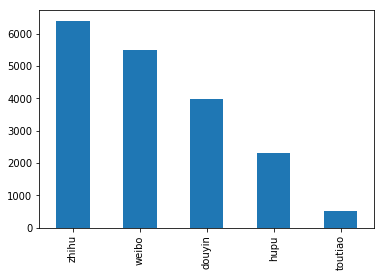

In [5]:
examples_df = pd.read_csv(exmaples_file)
class_counts = examples_df['label'].value_counts()
class_counts.plot.bar()
class_counts

                    precision    recall        f1
LogisticRegression   0.767452  0.767452  0.767452
SVM                  0.822912  0.822912  0.822912
GaussianNB           0.711349  0.711349  0.711349
tree                 0.982013  0.982013  0.982013
RandomForest         0.985225  0.985225  0.985225


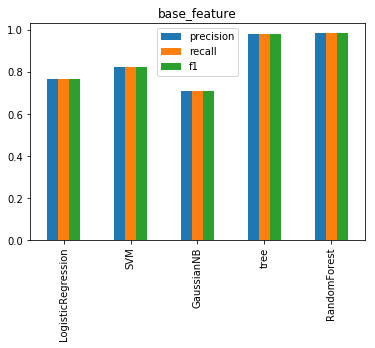

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,recall_score,precision_score
import random
examples = examples_df.values.copy()
#只取25个流统计特征
examples = np.c_[examples[:,:25].copy(),examples[:,-1].copy()]
#print(examples)
score_df = pd.DataFrame(np.zeros((5,3)),index = ['LogisticRegression', 'SVM', 'GaussianNB', 'tree', 'RandomForest'], \
                        columns = ['precision', 'recall', 'f1'])
#def a():

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = LogisticRegression()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['LogisticRegression'] = scores

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    #np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = SVC()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['SVM'] = scores

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    #np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = GaussianNB()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['GaussianNB'] = scores

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    #np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = tree.DecisionTreeClassifier()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['tree'] = scores

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    #np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = RandomForestClassifier()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['RandomForest'] = scores
print(score_df)
ax = score_df.plot.bar(title='base_feature')
fig = ax.get_figure()
#fig.savefig('../figure/base_feature.svg')
#print(score_df)